<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitskiy](https://yorko.github.io). 
Translated and edited by [Maxim Keremet](https://www.linkedin.com/in/maximkeremet/), [Artem Trunov](https://www.linkedin.com/in/datamove/), and [Aditya Soni](https://www.linkedin.com/in/aditya-soni-0505a9124/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center>Assignment #2. Fall 2018 <br> Exploratory Data Analysis (EDA) of US flights <br> (using Pandas, Matplotlib & Seaborn)

<img src='../../img/plane_sunset.png' width=50%>

Prior to working on the assignment, you'd better check out the corresponding course material:
 - [Visualization: from Simple Distributions to Dimensionality Reduction](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_visual_data_analysis.ipynb?flush_cache=true)
 - [Overview of Seaborn, Matplotlib and Plotly libraries](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_additional_seaborn_matplotlib_plotly.ipynb?flush_cache=true)
 - first lectures in [this](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX) YouTube playlist 

### Your task is to:
 - write code and perform computations in the cells below
 - choose answers in the [webform](https://docs.google.com/forms/d/1qSTjLAGqsmpFRhacv0vM-CMQSTT_mtOalNXdRTcdtM0/edit)
 - submit answers with **the very same email and name** as in assignment 1. This is a part of the assignment, if you don't manage to do so, you won't get credits. If in doubt, you can re-submit A1 form till the deadline for A1, no problem
 
### <center> Deadline for A2: 2018 October 21, 20:59 CET



In [1]:
import numpy as np
import pandas as pd
# pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'svg'

* Download the data [archive](http://stat-computing.org/dataexpo/2009/2008.csv.bz2) (Archived ~ 114 Mb, unzipped - ~ 690 Mb). No need to unzip - pandas can unbzip on the fly.
* Place it in the "../../data" folder, or change the path below according to your location.
* The dataset has information about carriers and flights between US airports during the year 2008. 
* Column description is available [here](http://www.transtats.bts.gov/Fields.asp?Table_ID=236). Visit this site to find ex. meaning of flight cancellation codes.

**Reading data into memory and creating a Pandas _DataFrame_ object**

(This may take a while, be patient)

We are not going to read in the whole dataset. In order to reduce memory footprint, we instead load only needed columns and cast them suitable data types.

In [3]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 'Cancelled': np.uint8, 
         'Year': np.uint16, 'FlightNum': np.uint16 , 'Distance': np.uint16, 
         'UniqueCarrier': str, 'CancellationCode': str, 'Origin': str, 'Dest': str,
         'ArrDelay': np.float16, 'DepDelay': np.float16, 'CarrierDelay': np.float16,
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 'SecurityDelay': np.float16,
         'LateAircraftDelay': np.float16, 'DepTime': np.float16}

In [4]:
%%time
# change the path if needed
path = '../../data/2008.csv.bz2'
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

CPU times: user 39.2 s, sys: 1.19 s, total: 40.4 s
Wall time: 40.5 s


**Check the number of rows and columns and print column names.**

In [5]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


In [6]:
print(flights_df.dtypes)

Year                  uint16
Month                  uint8
DayofMonth             uint8
DayOfWeek              uint8
DepTime              float16
UniqueCarrier         object
FlightNum             uint16
ArrDelay             float16
DepDelay             float16
Origin                object
Dest                  object
Distance              uint16
Cancelled              uint8
CancellationCode      object
CarrierDelay         float16
WeatherDelay         float16
NASDelay             float16
SecurityDelay        float16
LateAircraftDelay    float16
dtype: object


**Print first 5 rows of the dataset.**

In [7]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0


**Transpose the frame to see all features at once.**

In [8]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920
ArrDelay,-14,2,14,-6,34
DepDelay,8,19,8,-4,34
Origin,IAD,IAD,IND,IND,IND


**Examine data types of all features and total dataframe size in memory.**

In [9]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 19 columns):
Year                 uint16
Month                uint8
DayofMonth           uint8
DayOfWeek            uint8
DepTime              float16
UniqueCarrier        object
FlightNum            uint16
ArrDelay             float16
DepDelay             float16
Origin               object
Dest                 object
Distance             uint16
Cancelled            uint8
CancellationCode     object
CarrierDelay         float16
WeatherDelay         float16
NASDelay             float16
SecurityDelay        float16
LateAircraftDelay    float16
dtypes: float16(8), object(4), uint16(3), uint8(4)
memory usage: 387.7+ MB


**Get basic statistics of each feature.**

In [10]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,NaN,NaN,1.0,928.0,1325.0,1728.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ArrDelay,6855029.0,NaN,NaN,-519.0,-10.0,-2.0,12.0,2460.0
DepDelay,6873482.0,NaN,NaN,-534.0,-4.0,-1.0,8.0,2468.0
Distance,7009728.0,726.387029,562.101803,11.0,325.0,581.0,954.0,4962.0
Cancelled,7009728.0,0.019606,0.138643,0.0,0.0,0.0,0.0,1.0


In [11]:
flights_df.isnull().any()

Year                 False
Month                False
DayofMonth           False
DayOfWeek            False
DepTime               True
UniqueCarrier        False
FlightNum            False
ArrDelay              True
DepDelay              True
Origin               False
Dest                 False
Distance             False
Cancelled            False
CancellationCode      True
CarrierDelay          True
WeatherDelay          True
NASDelay              True
SecurityDelay         True
LateAircraftDelay     True
dtype: bool

**Count unique Carriers and plot their relative share of flights:**

In [12]:
flights_df['UniqueCarrier'].nunique()

20

In [13]:
flights_df.groupby('UniqueCarrier').size()

UniqueCarrier
9E     262208
AA     604885
AQ       7800
AS     151102
B6     196091
CO     298455
DL     451931
EV     280575
F9      95762
FL     261684
HA      61826
MQ     490693
NW     347652
OH     197607
OO     567159
UA     449515
US     453589
WN    1201754
XE     374510
YV     254930
dtype: int64

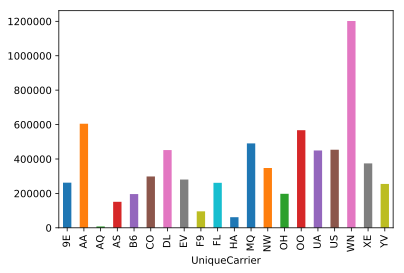

In [14]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar');

**We can also _group by_ category/categories in order to calculate different aggregated statistics.**

**For example, finding top-3 flight codes, that have the largest total distance travelled in year 2008.**

In [15]:
flights_df.head(1)

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
flights_df.groupby(['UniqueCarrier','FlightNum'])['Distance'].sum().sort_values(ascending=False).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244.0
               14           1796244.0
UA             52           1789722.0
Name: Distance, dtype: float64

**Another way:**

In [17]:
flights_df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Distance                  Cancelled
                                mean        sum count       sum
UniqueCarrier FlightNum                                        
CO            15         4962.000000  1796244.0   362         0
              14         4962.000000  1796244.0   362         0
UA            52         2465.181818  1789722.0   726         8

**Number of flights by days of week and months:**

In [18]:
flights_df.head(1)

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
pd.crosstab?

In [20]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


**It can also be handy to color such tables in order to easily notice outliers:**

In [21]:
plt.rcParams['figure.figsize']= 4, 6

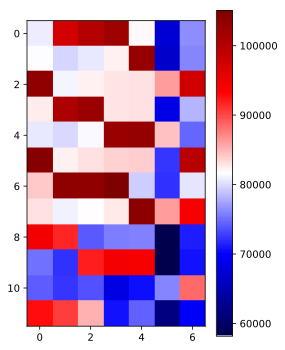

In [22]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek), cmap='seismic', interpolation=None);
plt.colorbar();

**Flight distance histogram:**

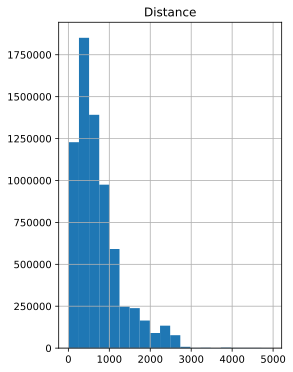

In [23]:
flights_df.hist('Distance', bins=20);

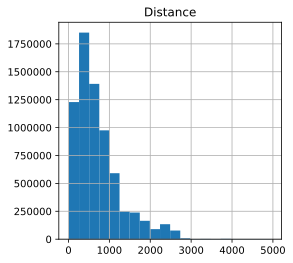

In [24]:
flights_df.hist('Distance', bins=20, figsize=(4,4));

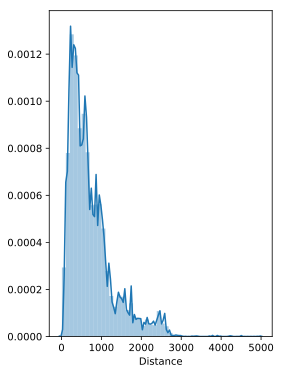

In [25]:
sns.distplot(flights_df['Distance'], norm_hist = True, kde=True);

**Making a histogram of flight frequency by date.**

In [26]:
flights_df.head(1)

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
pd.to_datetime?

In [28]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

In [29]:
flights_df.head(1)

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03


In [30]:
num_flights_by_date = flights_df.groupby('Date').size()

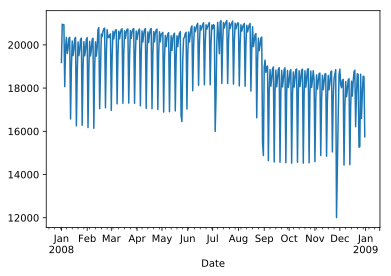

In [31]:
num_flights_by_date.plot(figsize=(6,4));

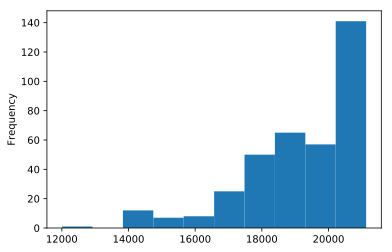

In [32]:
num_flights_by_date.plot(figsize=(6,4), kind='hist');

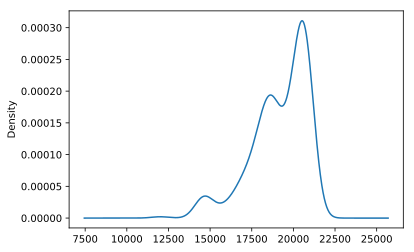

In [33]:
num_flights_by_date.plot(figsize=(6,4), kind='density');

**Do you see a weekly pattern above? And below?**

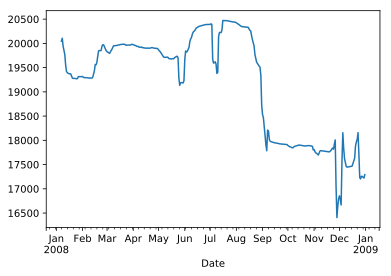

In [34]:
num_flights_by_date.rolling(window=7).mean().plot(figsize=(6,4));

**1. Find top-10 carriers in terms of the number of completed flights (_UniqueCarrier_ column)?**

**Which of the listed below is _not_ in your top-10 list?**
- DL
- AA
- OO
- EV 

In [35]:
# You code here
flights_df.head(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03


In [36]:
flights_df[flights_df['Cancelled']==1].head(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
178,2008,1,3,4,NaN,WN,126,NaN,NaN,LAS,OAK,407,1,A,NaN,NaN,NaN,NaN,NaN,2008-01-03
373,2008,1,3,4,NaN,WN,1146,NaN,NaN,LAX,OAK,337,1,A,NaN,NaN,NaN,NaN,NaN,2008-01-03


In [37]:
flights_df.shape

(7009728, 20)

In [38]:
flights_df.drop_duplicates().shape

(7009724, 20)

In [39]:
flights_df.CancellationCode.unique()

array([nan, 'A', 'C', 'B', 'D'], dtype=object)

In [40]:
# Completed and Cancelled
flights_df.groupby('UniqueCarrier').size().sort_values(ascending=False).iloc[:10]

UniqueCarrier
WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
dtype: int64

In [41]:
# Only completed (not cancelled)
flights_df[flights_df['Cancelled']==0].groupby('UniqueCarrier').size().sort_values(ascending=False).iloc[:10]

UniqueCarrier
WN    1189365
AA     587445
OO     554723
MQ     472362
US     447007
DL     445118
UA     438974
XE     364518
NW     344746
CO     294753
dtype: int64

In [42]:
#answer: EV

**2. Plot distributions of flight cancellation reasons (_CancellationCode_).**

**What is the most frequent reason for flight cancellation? (Use this [link](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) to translate codes into reasons)**
- carrier
- weather conditions 
- National Air System
- security reasons

In [43]:
# You code here
flights_df.head(1)

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03


In [44]:
flights_df.groupby('CancellationCode').size()

CancellationCode
A    54330
B    54904
C    28188
D       12
dtype: int64

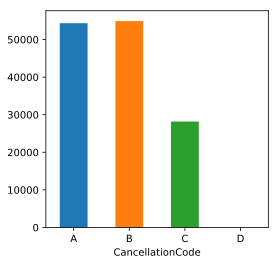

In [45]:
flights_df.groupby('CancellationCode').size().plot(kind='bar', figsize=(4,4), rot='0');

In [46]:
#answer Weather Conditions

**3. Which route is the most frequent, in terms of the number of flights?**

(Take a look at _'Origin'_ and _'Dest'_ features. Consider _A->B_ and _B->A_ directions as _different_ routes) 

 - New-York – Washington
 - San-Francisco – Los-Angeles 
 - San-Jose – Dallas
 - New-York – San-Francisco

In [47]:
# You code here
flights_df.head(3)

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03


In [48]:
# Excluding cancelled flights
flights_df[flights_df['Cancelled']==0].groupby(['Origin', 'Dest']).size().sort_values(ascending=False).head(2)

Origin  Dest
SFO     LAX     13299
LAX     SFO     12935
dtype: int64

In [49]:
# Including cancelled flights
flights_df.groupby(['Origin', 'Dest']).size().sort_values(ascending=False).head(2)

Origin  Dest
SFO     LAX     13788
LAX     SFO     13390
dtype: int64

In [50]:
# AnswerL SFO -> LAX (San-Francisco - Los-Angeles)

**4. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

- 449 
- 539 
- 549 
- 668 

In [51]:
flights_df.head(1)

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03


In [52]:
df4 = pd.DataFrame(flights_df[flights_df['DepDelay'] > 0]\
             .groupby(['Origin','Dest']).size().sort_values(ascending=False).iloc[:5]).reset_index()

In [53]:
df4.rename(columns={0: 'size'}, inplace=True)

In [54]:
df4

,Origin,Dest,size
0,LAX,SFO,6253
1,DAL,HOU,5742
2,SFO,LAX,5322
3,ORD,LGA,5311
4,HOU,DAL,5288


In [55]:
df4_2 = flights_df.dropna(axis=0, subset=['WeatherDelay'])

In [56]:
df4_2 = df4_2[df4_2.WeatherDelay > 0]

In [57]:
pd.merge(left = df4, right=df4_2, on=['Origin','Dest'], how='inner')['size'].count()

668

In [58]:
# Answer: 668

**5. Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.**

**Choose all correct statements:**
 - Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
 - Flights are uniformly distributed within time interval [0-23].
 - In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

In [59]:
df5 = pd.DataFrame(flights_df.DepTime)

In [60]:
df5.head(1)

,DepTime
0,2003.0


In [61]:
df5.dropna(subset=['DepTime'], axis=0, inplace=True)

In [62]:
df5.DepTime.isna().sum()

0

In [63]:
df5['DepTimeMinutes'] = df5['DepTime'].apply(lambda x: int(x)//100 * 60 + int(x)%100)

In [64]:
df5.DepTimeMinutes.isna().sum()

0

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


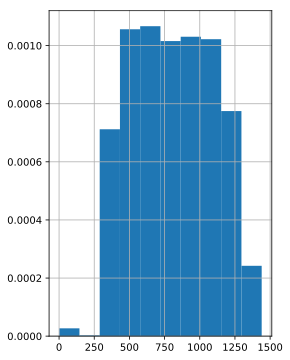

In [65]:
df5.DepTimeMinutes.hist(normed=True)

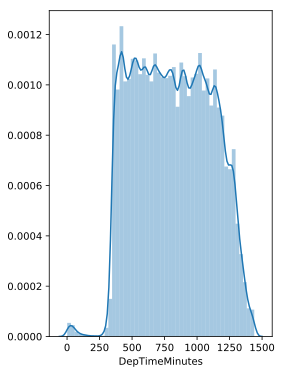

In [76]:
sns.distplot(df5.DepTimeMinutes,  kde_kws={'bw': })

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


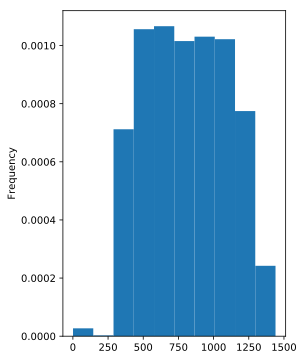

In [66]:
df5.DepTimeMinutes.plot(kind='hist', normed=True)

In [67]:
df5

,DepTime,DepTimeMinutes
0,2003.0,1203
1,754.0,474
2,628.0,388
3,926.0,566
4,1829.0,1109
5,1940.0,1180
6,1937.0,1177
7,1039.0,639
8,617.0,377
9,1620.0,980


In [68]:
df5 = df5.dropna()

In [69]:
df5.DepTime = df5.DepTime.apply(lambda x: int(x))

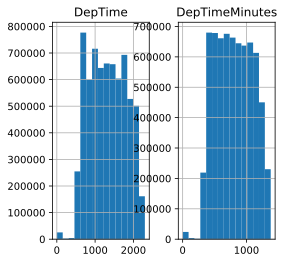

In [70]:
df5[(df5.DepTime <= 2300) & (df5.DepTime >= 0)].hist(bins=15, figsize=(4,4));

ValueError: color kwarg must have one color per dataset

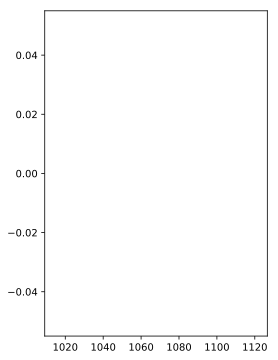

In [71]:
sns.distplot(df5[(df5.DepTime <= 2300) & (df5.DepTime >= 0)]);

**6. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

**Choose all correct statements:**
- The number of flights during weekends is less than during weekdays (working days).
- The lowest number of flights is on Sunday.
- There are less flights during winter than during summer.  

In [ ]:
# You code here
flights_df.head(1)

In [ ]:
# check the first statement
# The number of flights during weekends is less than during weekdays (working days).
print ('Weekends flights (including cancelled): %r' % flights_df[(flights_df['DayOfWeek'] == 6) |\
                                           (flights_df['DayOfWeek'] == 7)]['Origin'].count())
print ('WeekDays flights (including cancelled): %r' % flights_df[(flights_df['DayOfWeek'] != 6) |\
                                           (flights_df['DayOfWeek'] != 7)]['Origin'].count())
print ("")
print ('Weekends flights (excluding cancelled): %r' % flights_df[((flights_df['DayOfWeek'] == 6) |\
                                           (flights_df['DayOfWeek'] == 7)) &\
                                           (flights_df['Cancelled'] == 1)]['Origin'].count())
print ('WeekDays flights (excluding cancelled): %r' % flights_df[((flights_df['DayOfWeek'] != 6) |\
                                           (flights_df['DayOfWeek'] != 7)) & 
                                           (flights_df['Cancelled'] == 1)]['Origin'].count())

In [ ]:
# check the second statement
# The lowest number of flights is on Sunday.
flights_df['DayOfWeek'].hist();

In [ ]:
flights_df.Origin.isna().any()

In [ ]:
# check the third statement
# There are less flights during winter than during summer.
winter_ = flights_df[(flights_df['Month'] == 12) | (flights_df['Month'] == 1) | (flights_df['Month'] == 2)]

summer_ = flights_df[(flights_df['Month'] == 6) | (flights_df['Month'] == 7) | (flights_df['Month'] == 8)]

print ("Winter flights %r " % winter_['Origin'].count())
print ("Summer flights %r " % summer_['Origin'].count())

**7. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**

**Choose all correct statements:**
- December has the highest rate of cancellations due to weather. 
- The highest rate of cancellations in September is due to Security reasons.
- April's top cancellation reason is carriers.
- Flights cancellations due to National Air System are more frequent than those due to carriers.

In [ ]:
# You code here
flights_df.head(1)

In [ ]:
# check the first statement
# check December has the highest rate of cancellations due to weather

# codes: 
#A	Carrier
#B	Weather
#C	National Air System
#D	Security
(flights_df.groupby(['CancellationCode'])['CancellationCode'].count() /\
flights_df['CancellationCode'].count()).sort_values(ascending=False)

In [ ]:
# check the second statement
# The highest rate of cancellations in September is due to Security reasons
(flights_df[flights_df['Month']==9].groupby('CancellationCode')['CancellationCode'].count() /\
flights_df[flights_df['Month']==9]['CancellationCode'].count()).sort_values(ascending=False)

In [ ]:
flights_df.head(1)

In [ ]:
# check the third statement
# April's top cancellation reason is carriers
flights_df[flights_df['Month'] == 4].groupby('CancellationCode')['CancellationCode']\
                                    .count().sort_values(ascending=False)

In [ ]:
# check the fourth statement
# Flights cancellations due to National Air System are more frequent than those due to carriers

# codes: 
#A	Carrier
#B	Weather
#C	National Air System
#D	Security

flights_df.groupby('CancellationCode')['CancellationCode'].count().sort_values(ascending=False)

**8. Which month has the greatest number of cancellations due to Carrier?** 
- May
- January
- September
- April 

In [ ]:
# You code here
flights_df.head(1)

In [ ]:
print ("May: %r " % flights_df[(flights_df['CancellationCode'] == 'A')  &\
                               (flights_df['Month'] == 5)].groupby('Month')['Month'].count().values[0])

print ("January: %r " % flights_df[(flights_df['CancellationCode'] == 'A')  &\
                                   (flights_df['Month'] == 1)].groupby('Month')['Month'].count().values[0])
       
print ("September: %r " % flights_df[(flights_df['CancellationCode'] == 'A') &\
                                     (flights_df['Month'] == 9)].groupby('Month')['Month'].count().values[0])
       
print ("April: %r " % flights_df[(flights_df['CancellationCode'] == 'A')  &\
                  (flights_df['Month'] == 4)].groupby('Month')['Month'].count().values[0])

In [ ]:
# Answer: April

**9. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**

- 9E
- EV
- HA
- AA

In [ ]:
# You code here
flights_df[(flights_df['Month'] == 4) & (flights_df['CancellationCode'] == 'A')]\
                        .groupby('UniqueCarrier')['UniqueCarrier'].count().sort_values(ascending=False)

In [ ]:
# Answer: AA

**10. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay').
[Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile.**

- EV
- OO
- AA
- AQ 

In [ ]:
# You code here
flights_df.head(3)

In [ ]:
df10 = flights_df[(flights_df['ArrDelay'] > 0) & (flights_df['DepDelay'] > 0)][['UniqueCarrier','ArrDelay','DepDelay']]

In [ ]:
df10.head(1)

In [ ]:
df10.groupby('UniqueCarrier').median().sort_values(by=['ArrDelay','DepDelay'], ascending=True)

In [ ]:
# Answer: AQ